In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset


# import the normalized slices
slices = pd.read_csv('data/slices_normalized.csv', index_col=0)

# Convert the DataFrame to a numpy array, then to a PyTorch Tensor
slices_tensor = torch.tensor(slices.values)

# Convert your data to a TensorDataset
slices_dataset = TensorDataset(slices_tensor)

# DEFINES THE BATCH SIZE
batch_size = 32

# Create a DataLoader with shuffle=True for shuffling at each epoch
slices_loader = DataLoader(slices_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

/var/folders/b4/spskmk5x6xggprwkxqclxbb40000gn/T/ipykernel_46018/4277157898.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# plots a slice
def plot_slice(slice_tensor):
    plt.figure(figsize=(10, 6))
    plt.plot(slice_tensor.numpy())
    plt.title('Slice Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    
    # Adjust x-ticks to show only 10 values
    plt.xticks(np.linspace(0, len(slice_tensor)-1, 10))
    
    plt.show()

<Figure size 640x480 with 0 Axes>

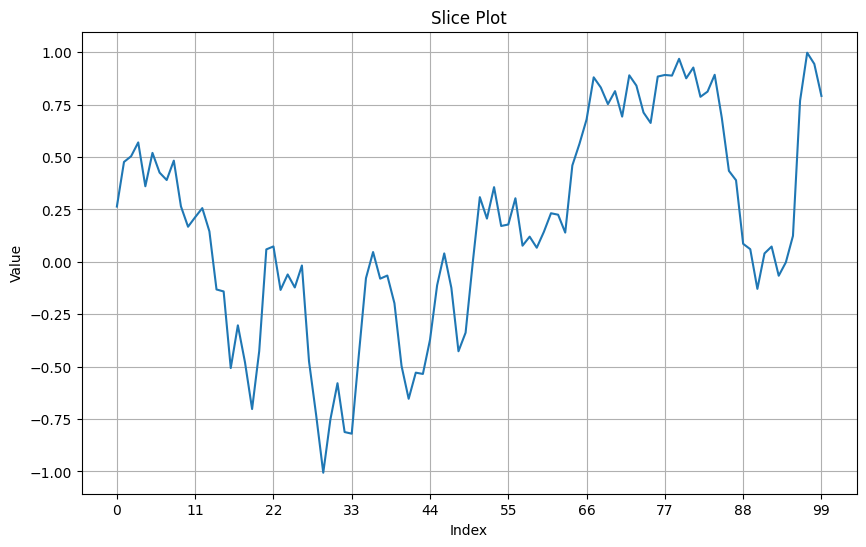

0


<Figure size 640x480 with 0 Axes>

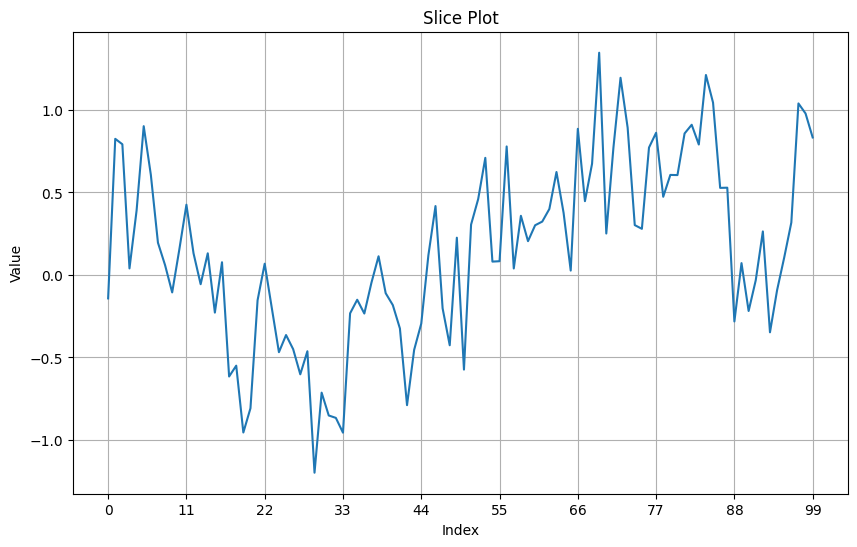

10


<Figure size 640x480 with 0 Axes>

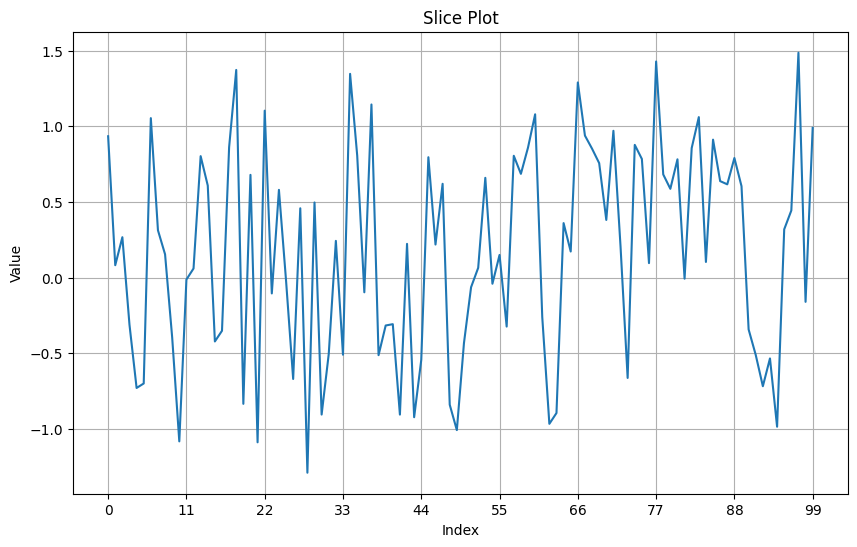

20


<Figure size 640x480 with 0 Axes>

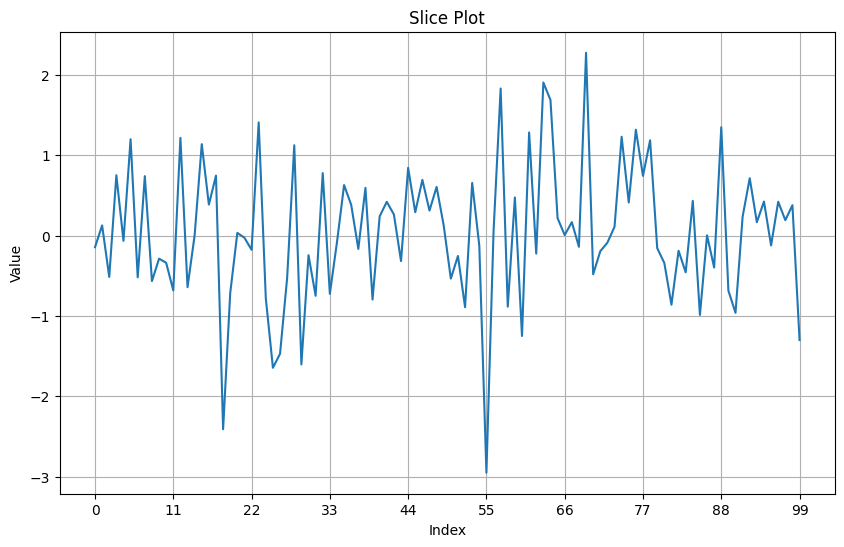

30


<Figure size 640x480 with 0 Axes>

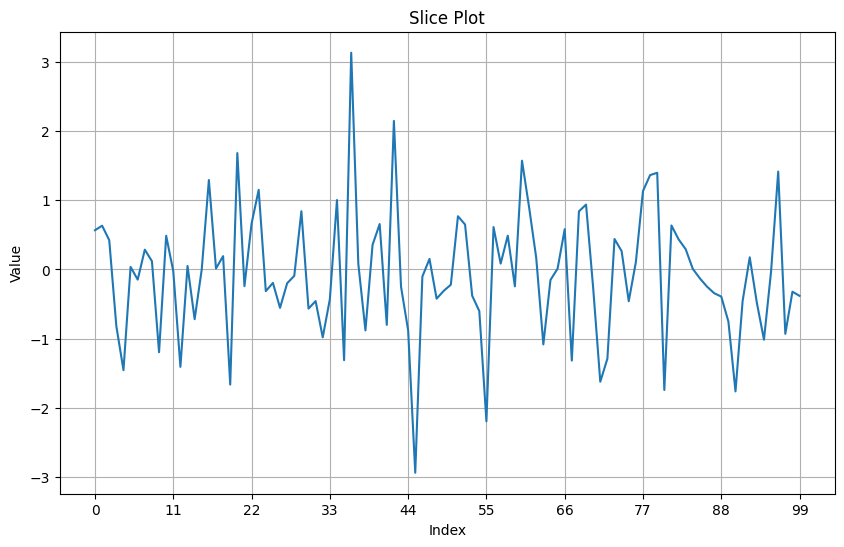

40


In [5]:
from forward import forward_diffusion_sample, T, sqrt_alphas_cumprod, sqrt_one_minus_alphas_cumprod

# simulates a forward process:
slice_0 = next(iter(slices_loader))[0][0]



# Define the number of plots to generate
num_plot = 5

# Define the step size
step_size = int(T/num_plot)

# Generate and save the images
for i, index in enumerate(range(0, T, step_size)):
    t = torch.tensor([index]).type(torch.int64)
    slice_t, noise_t = forward_diffusion_sample(slice_0, t)
    
    plt.figure()  # Create a new figure
    plot_slice(slice_t)
    print(index)

